<a href="https://colab.research.google.com/github/Ahmed-Eladl/A-Journey-through-Titanic/blob/main/Regression_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learn Machine Learning by Projects** : Based on ML Bookcamp 

[The book](https://www.manning.com/books/machine-learning-bookcamp?a_aid=AGMLBookcamp&a_bid=2eb9ca01) , [Original Repo]( https://github.com/alexeygrigorev/mlbookcamp-code )

<img src="https://images.manning.com/360/480/resize/book/d/f91ead8-e9eb-412e-8f75-5f2d7f588e67/Grigorev-MLB-HI.png" width="200">




# Reading Data

In [1]:
!git clone https://github.com/alexeygrigorev/mlbookcamp-code

Cloning into 'mlbookcamp-code'...
remote: Enumerating objects: 3730, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 3730 (delta 223), reused 328 (delta 161), pack-reused 3321
Receiving objects: 100% (3730/3730), 8.26 MiB | 37.26 MiB/s, done.
Resolving deltas: 100% (2235/2235), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df = pd.read_csv('/content/mlbookcamp-code/chapter-02-car-price/data.csv')
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.shape

(11914, 16)

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

As we see, this dataset contains multiple columns:

`make`: make of a car (BMW, Toyota, and so on)

`model`: model of a car

`year`: year when the car was manufactured

`engine_fuel_type`: type of fuel the engine needs (diesel, electric, and so on)

`engine_hp`: horsepower of the engine

`engine_cylinders`: number of cylinders in the engine

`transmission_type`: type of transmission (automatic or manual)

`driven_wheels`: front, rear, all

`number_of_doors`: number of doors a car has

`market_category`: luxury, crossover, and so on

`vehicle_size`: compact, midsize, or large

`vehicle_style`: sedan or convertible

`highway_mpg`: miles per gallon (mpg) on the highway

`city_mpg`: miles per gallon in the city

`popularity`: number of times the car was mentioned in a Twitter stream

`msrp`: manufacturer’s suggested retail price

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

Make : 48
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: Make, dtype: int64

********************

Model : 915
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: Model, dtype: int64

********************

Year : 28
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: Year, dtype: int64

********************

Engine Fuel Type : 10
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: Engine Fuel Type, dtype: int64

********************

Engine HP : 356
200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
Name: Engine HP, dtype: int64

********************

Engine Cylinders : 9
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
Name: Engine Cylinders, dtype: int64

# Some Cleaning

In [9]:
# let's make all cat_columns and rows in lower case  and remove all spaces 
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(string_columns)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [10]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [11]:
df.rename(columns = {'msrp': 'price'}, inplace = True)

In [12]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

In [13]:
#Numerical
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


> You can observe the scale, expected distribution, abnormal values and ... etc

In [14]:
#categorical
df.describe(include=['O'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


## Target variable analysis (price)

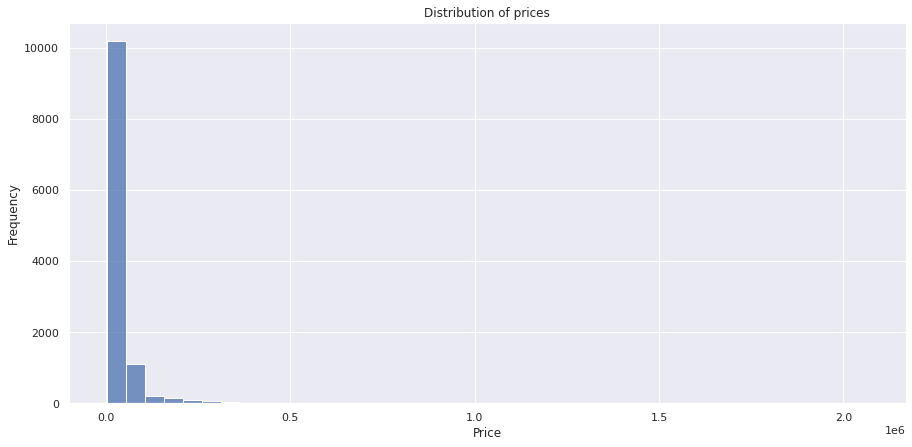

In [15]:
plt.figure(figsize=(15, 7))

sns.histplot(df.price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

This is a `long tail` distribution, which is a typical situation for many items with low prices and very few expensive ones.
    
    We can have a closer look by zooming in a bit and looking at values below $100,000

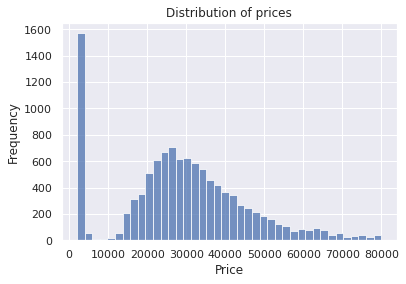

In [16]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price[df.price < 80000], bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

The long tail makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won’t learn well enough. 
    
    One way to solve this problem is log transformation. 

## Log Transformation

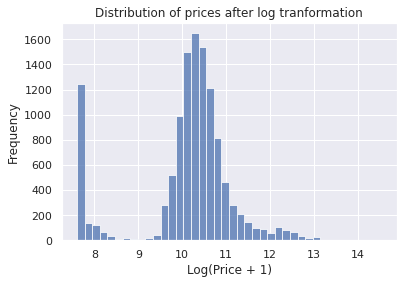

In [17]:
df['log_price'] = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(df.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

The effect of the long tail is removed, and we can see the entire distribution in one plot.

The +1 part is important in cases that have zeros. The logarithm of zero is minus infinity, but the logarithm of one is zero. 

For our specific case, zero values are not an issue—all the prices we have start at $2,000—but it’s still a convention that we follow.

In [18]:
df.price.skew()

11.771987129334972

In [19]:
df.log_price.skew()

-0.9178678067039072

**Positive Skewness vs. Negative Skewness**

![](https://www.researchgate.net/profile/Marco-Faria/publication/294890337/figure/fig5/AS:668873900716049@1536483373457/a-Negative-skewness-b-Normal-curve-c-Positive-skewness-Durkhure-and-Lodwal-2014.ppm)

> Check this article

[Top 3 Methods for Handling Skewed Data](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)

## Check missing values and handiling it

In [20]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.74
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650,10.61
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.50
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450,10.29
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500,10.45


In [21]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

> we have missing values( numerical and categorical). 

> But at least, Our target (price) has no missing values. 

1) for numerical features

In [22]:
df['engine_hp'].replace(np.NaN , df['engine_hp'].mean(),inplace=True)

In [23]:
df['engine_cylinders'].replace(np.NaN , df['engine_cylinders'].mean(),inplace=True)

In [24]:
df['number_of_doors'].replace(np.NaN , df['number_of_doors'].mean(),inplace=True)

In [25]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp               0
engine_cylinders        0
transmission_type       0
driven_wheels           0
number_of_doors         0
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

In [26]:
print(df['engine_fuel_type'].mode())
print(df['market_category'].mode())

0    regular_unleaded
dtype: object
0    crossover
dtype: object


In [27]:
df["engine_fuel_type"].fillna(df['engine_fuel_type'].mode().iloc[0],inplace=True)

**market category has a lot of null values we will remove the column because it is not helpful in training data**

In [28]:
df.drop('market_category', axis=1,inplace=True)

In [29]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
price                0
log_price            0
dtype: int64

## Check categorical columns

In [30]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

> Keep in mind that we will need to handle categorical columns ( to be transformed into numerical form)

## Some Questions

### What's the average price of BMW cars in the dataset?

In [31]:
df.make.value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

In [32]:
df.groupby('make').mean()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
make,,,,,,,,,
acura,"2,010.06",244.80,5.33,3.62,28.11,19.94,204.00,"34,887.59",10.14
alfa_romeo,"2,015.40",237.00,4.00,2.00,34.00,24.00,113.00,"61,600.00",11.02
aston_martin,"2,013.02",484.32,10.62,2.15,18.89,12.53,259.00,"197,910.38",12.14
audi,"2,012.23",277.70,5.56,3.47,28.82,19.59,"3,105.00","53,452.11",10.48
bentley,"2,011.70",533.85,9.73,2.68,18.91,11.55,520.00,"247,169.32",12.40
bmw,"2,014.35",326.91,5.96,3.16,29.25,20.74,"3,916.00","61,546.76",10.91
bugatti,"2,008.33","1,001.00",16.00,2.00,14.00,8.00,820.00,"1,757,223.67",14.37
buick,"2,010.01",219.24,5.32,3.84,26.95,18.70,155.00,"28,206.61",9.96
cadillac,"2,013.15",332.31,6.43,3.60,25.24,17.36,"1,624.00","56,231.32",10.81


In [33]:
df.groupby('make').mean()['price']['bmw']

61546.76347305389

### Compare the average price for cars before / after year 2015 



In [34]:
df[df['year'] >= 2015]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
32,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,compact,convertible,35,26,819,27495,10.22
33,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,compact,convertible,35,26,819,24995,10.13
34,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,compact,convertible,35,26,819,28195,10.25
41,bmw,2_series,2016,premium_unleaded_(required),240.00,4.00,automatic,rear_wheel_drive,2.00,compact,coupe,35,23,3916,32850,10.40
42,bmw,2_series,2016,premium_unleaded_(required),240.00,4.00,automatic,rear_wheel_drive,2.00,compact,convertible,34,23,3916,38650,10.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,bmw,z4,2015,premium_unleaded_(required),300.00,6.00,automated_manual,rear_wheel_drive,2.00,compact,convertible,24,17,3916,56950,10.95
11899,bmw,z4,2015,premium_unleaded_(required),335.00,6.00,automated_manual,rear_wheel_drive,2.00,compact,convertible,24,17,3916,65800,11.09
11900,bmw,z4,2016,premium_unleaded_(required),300.00,6.00,automated_manual,rear_wheel_drive,2.00,compact,convertible,24,17,3916,57500,10.96
11901,bmw,z4,2016,premium_unleaded_(required),240.00,4.00,manual,rear_wheel_drive,2.00,compact,convertible,34,22,3916,49700,10.81


In [35]:
df.price.mean()

40594.737032063116

In [36]:
df[df['year'] >= 2015]['price'].mean()

45667.156463719766

In [37]:
df[df['year'] < 2015]['price'].mean()

35457.18770062511

# Validation framework

![](https://vitalflux.com/wp-content/uploads/2020/12/Hold-out-method-for-model-selection.png)

image credit : https://vitalflux.com/hold-out-method-for-training-machine-learning-model/

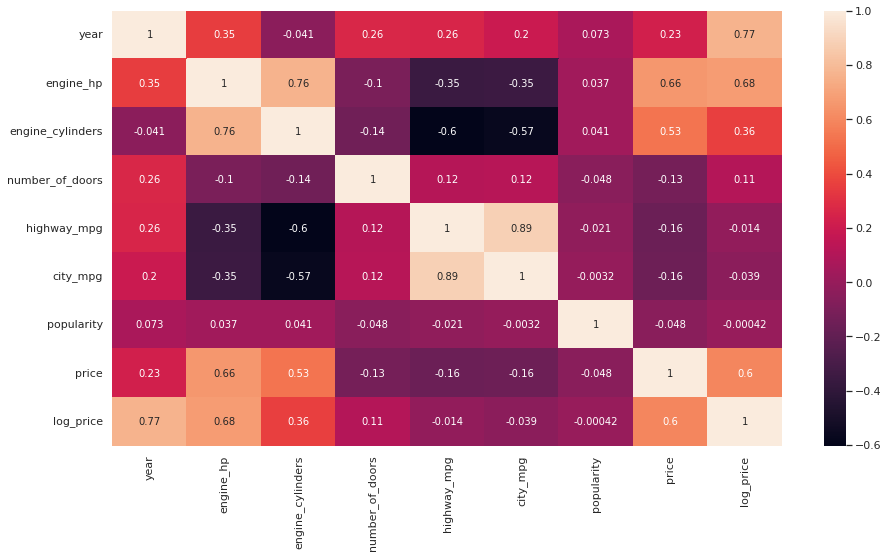

In [38]:
# the correlation between numerical features
plt.figure(figsize=(15,8))
_=sns.heatmap(df.corr(), annot = True)

In [39]:
# Feature Engineering
#Label Encoding


le = LabelEncoder()
cat_features = ['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style']

for i in cat_features:
    df[i] = le.fit_transform(df[i])

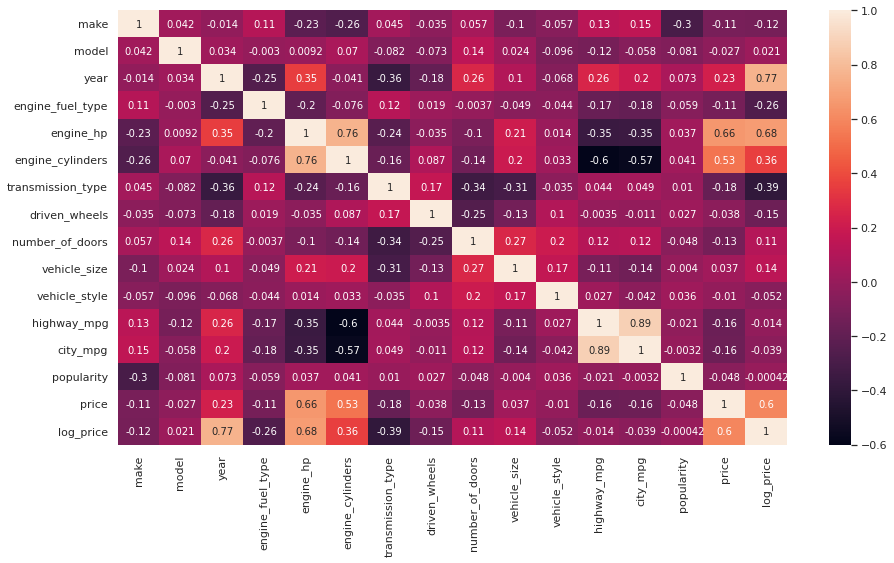

In [40]:
# the correlation between all features
plt.figure(figsize=(15,8))
_=sns.heatmap(df.corr(), annot = True)

we have 
- 1) positive correlation 
- 2) Negative correlation 


 - **year , engine_hp , engine_cylinders have the higher positive correlation with log_price**

- **transimition_type , engine_fuel_type , driven_wheels have the higher Negative correlation with log_price**

In [41]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,5,4,2011,8,335.00,6.00,3,3,2.00,0,8,26,19,3916,46135,10.74
1,5,3,2011,8,300.00,6.00,3,3,2.00,0,6,28,19,3916,40650,10.61
2,5,3,2011,8,300.00,6.00,3,3,2.00,0,8,28,20,3916,36350,10.50
3,5,3,2011,8,230.00,6.00,3,3,2.00,0,8,28,18,3916,29450,10.29
4,5,3,2011,8,230.00,6.00,3,3,2.00,0,6,28,18,3916,34500,10.45


In [42]:
X = df.drop(columns=['price','log_price'], axis=1)
Y = df['price']

In [43]:
print(X)

       make  model  year  engine_fuel_type  engine_hp  engine_cylinders  \
0         5      4  2011                 8     335.00              6.00   
1         5      3  2011                 8     300.00              6.00   
2         5      3  2011                 8     300.00              6.00   
3         5      3  2011                 8     230.00              6.00   
4         5      3  2011                 8     230.00              6.00   
...     ...    ...   ...               ...        ...               ...   
11909     0    912  2012                 8     300.00              6.00   
11910     0    912  2012                 8     300.00              6.00   
11911     0    912  2012                 8     300.00              6.00   
11912     0    912  2013                 7     300.00              6.00   
11913    25    913  2006                 9     221.00              6.00   

       transmission_type  driven_wheels  number_of_doors  vehicle_size  \
0                      3 

In [44]:
print(Y)

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: price, Length: 11914, dtype: int64


**Splitting the data into Training data & Testing Data**

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(11914, 14) (9531, 14) (2383, 14)


In [47]:
print(Y.shape, Y_train.shape, Y_test.shape)

(11914,) (9531,) (2383,)


# Building Model

1) Linear regression

In [48]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [49]:
# prediction on training data
training_data_prediction = LR.predict(X_train)

In [50]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train *100, "%")

R Squared value =  49.404666541566264 %


In [51]:
# prediction on test data
test_data_prediction = LR.predict(X_test)

In [52]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test *100, "%")

R Squared value =  44.77022655248363 %


**2) Random Forest Regressor**

In [53]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22)

In [54]:
# prediction on training data
training_data_prediction = RF.predict(X_train)

In [55]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train *100, "%")

R Squared value =  65.40070433613889 %


In [56]:
# prediction on test data
test_data_prediction = RF.predict(X_test)

In [57]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test *100, "%")

R Squared value =  58.02254361946373 %


3) XG regressor

In [58]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

[17:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [59]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [60]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train*100, "%")

R Squared value =  95.4715234653237 %


In [61]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [62]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [63]:
print('R Squared value = ', r2_test *100, "%")

R Squared value =  82.66054347181998 %


4)  Decision  Tree

In [64]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train,Y_train)
y_pred_dec = decision.predict(X_test)

decision_accuracy = round(metrics.r2_score(y_pred_dec, Y_test) * 100)

print("R Squared value =  :",decision_accuracy ,"%")

R Squared value =  : 83 %


The highest accuracy is 82.66%% (XG regressor).